# Text Vectorization- Part 1

### Text vectorization is the process of converting text data (words, sentences, or documents) into numerical format 
so that machine learning models can process and analyze them. Since machine learning algorithms can’t work with raw text, text vectorization methods transform text into vectors (arrays of numbers) that represent the words or structures within the text.



#### Text Vectorization Techniques
##### 1. Count Vectorization (Bag of Words)
##### 2.TF-IDF (Term Frequency-Inverse Document Frequency)
##### 3.Word Embeddings (Word2Vec, GloVe)
##### 4.Document Embeddings (Doc2Vec)
##### 5. Transformers (BERT, GPT)

#### Count Vectorization (Bag of Words)
##### In this approach, each word in the document is given a unique integer ID, and the text is represented by counting the frequency of each word. This forms a vector with each position corresponding to a word and the value being the count.

#### How Count Vectorization Works
The process involves a few key steps:

##### 1.Tokenization: Splitting text into individual words (or tokens). For example, the sentence "I love NLP" is split into three tokens: ["I", "love", "NLP"].

##### 2.Building the Vocabulary: Create a vocabulary list by identifying all unique words across the entire corpus. The order of words in the list doesn’t matter; each word in the vocabulary represents a "feature" or a "dimension."

##### 3.Vectorization: Each document is then represented as a vector, with each position corresponding to a word in the vocabulary. The value in each position of this vector is the count of the word in the document.

##### 4.Sparse Matrix Representation: Since not all words appear in every document, many positions in the vector will be zero. To save memory, the resulting vectors are often represented in a sparse matrix format.

#### a small corpus with three documents:
#### Document 1: "I love data science"
#### Document 2: "I love machine learning"
#### Document 3: "data science and machine learning"
The vocabulary generated from this corpus would look something like this (sorted alphabetically):

Vocabulary: ["I", "love", "data", "science", "machine", "learning", "and"]
Each document can then be represented as a vector with counts for each word in the vocabulary:

#### Document:	      "I" "love"	"data"	"science"	"machine"	"learning"	"and"
#### Document 1:	1	1	1	1	0	0	0
#### Document 2:	1	1	0	0	1	1	0
#### Document 3:	0	0	1	1	1	1	1
Here’s how each document vector is formed:

#### Document 1: It contains "I," "love," "data," and "science" once each, so it has values 1 in those positions.
##### Document 2: It contains "I," "love," "machine," and "learning" once each, so it has values 1 in those positions.
#### Document 3: It contains "data," "science," "machine," "learning," and "and," so it has values 1 in those positions.
#### This resulting matrix is the count-based vectorized form of the text, also known as a document-term matrix (DTM).

### Limitations of Count Vectorization
##### No Semantic Information: It treats each word independently, so words like "good" and "excellent" are as different as "good" and "bad." There’s no notion of synonyms or related words.
##### Sparsity: For large vocabularies, count vectorization produces very sparse matrices with many zero entries, which can lead to memory inefficiency.
##### No Word Order: The order of words is disregarded, so it loses context. "I love NLP" and "NLP love I" would have the same vector.

In [31]:
### install libraries
! pip install scikit-learn
! pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------ --------------------------------- 1.3/7.8 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 3.4/7.8 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 15.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 31.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 13.4 MB/s eta 0:00:00


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
corpus = [
    "I love data science",
    "I love machine learning",
    "data science and machine learning"
]

# Initialize CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# Display the vocabulary and the count vectors
print("Vocabulary:", vectorizer.get_feature_names_out())
print("Count Vectors:\n", X.toarray())


Vocabulary: ['and' 'data' 'learning' 'love' 'machine' 'science']
Count Vectors:
 [[0 1 0 1 0 1]
 [0 0 1 1 1 0]
 [1 1 1 0 1 1]]


## 2. TF-IDF 
TF-IDF (Term Frequency-Inverse Document Frequency) is an advanced text vectorization technique used in Natural Language Processing (NLP). It’s commonly applied to reflect the importance of a word in a document relative to the entire corpus of documents. Unlike simple count vectorization, which merely counts word occurrences, TF-IDF adjusts word counts by their relevance to the document, reducing the weight of commonly occurring words (like "the" or "is") that appear in most documents.

#### Key Concepts of TF-IDF
TF-IDF is composed of two parts:

#### Term Frequency (TF): Measures how often a word appears in a document.
#### Inverse Document Frequency (IDF): Measures how unique or rare a word is across the entire corpus.
These two metrics are combined to get the TF-IDF score for each word in each document, providing a weighted representation of word importance.

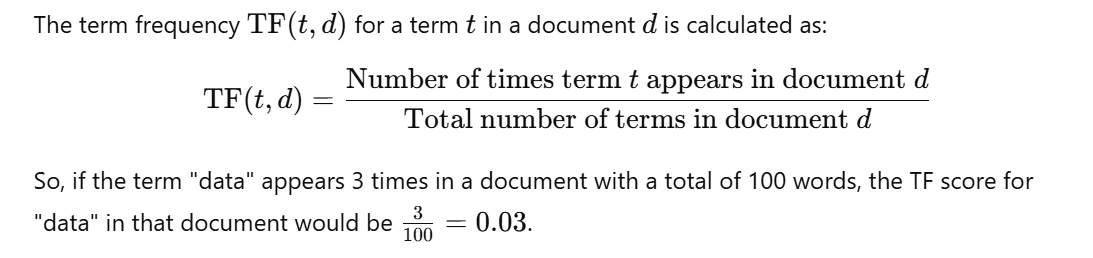

In [9]:
#### 1. Term Frequency (TF)
# from IPython.display import Image
# Image(filename="C:\\NLP_Knowledge_Sharing\\pictures\\Term Freq.PNG")


##### Intuition: Term frequency gives an idea of how important a word is within a specific document.



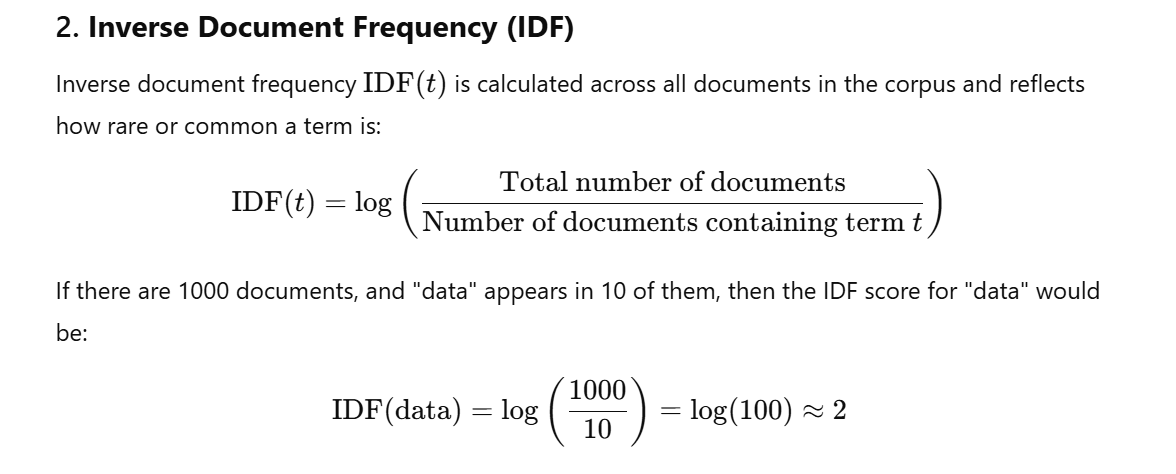

In [12]:
# Image(filename="C:\\NLP_Knowledge_Sharing\\pictures\\IDF.PNG")


#### Intuition: The less frequently a term appears across documents, the higher its IDF value, giving it more importance in documents where it does appear.

#### > Common terms like "the" or "and" get very low IDF scores, reducing their influence.
#### > Rare terms get higher IDF scores, highlighting their significance.


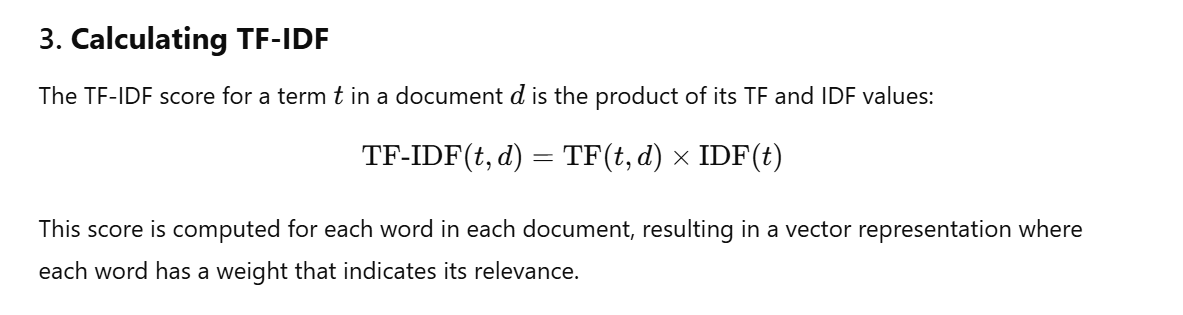

In [13]:
# Image(filename="C:\\NLP_Knowledge_Sharing\\pictures\\calculate.PNG")


#### Example Calculation
Let’s go through a simple example.

Assume we have a corpus with three documents:

#### Document 1: "data science is amazing"
#### Document 2: "machine learning is the future"
#### Document 3: "data science and machine learning"
Let's calculate the TF-IDF for the word "data" in each document:

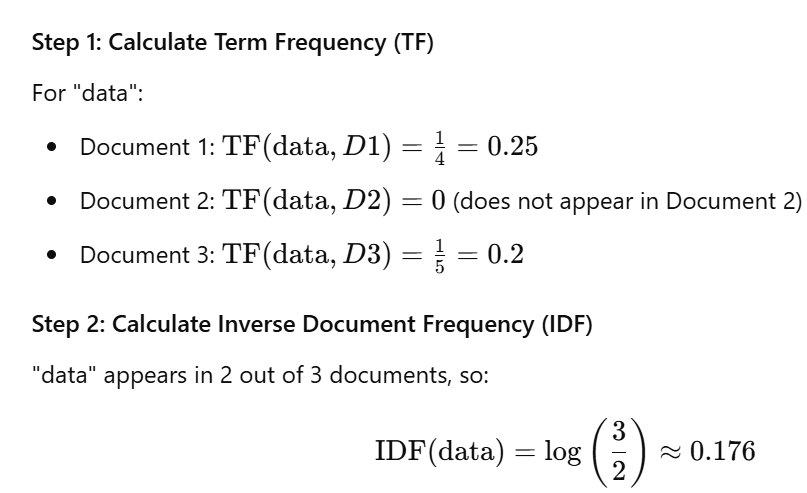

In [17]:
# Image(filename="C:\\NLP_Knowledge_Sharing\\pictures\\calculation.PNG")


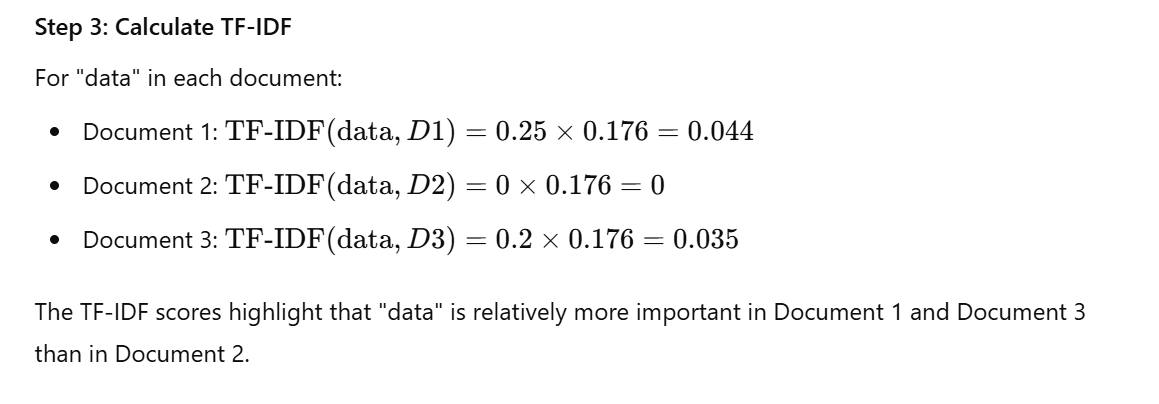

In [18]:
#Image(filename="C:\\NLP_Knowledge_Sharing\\pictures\\calculation2.PNG")


### Limitations of TF-IDF
#### Ignores Synonymy and Semantics: TF-IDF doesn’t capture relationships between words with similar meanings (like "car" and "vehicle").
#### Sparse Representation: Like Count Vectorization, TF-IDF produces sparse matrices, especially with large vocabularies.
#### Context-Insensitive: Word order and context are not preserved, so TF-IDF cannot understand phrases or relationships between words.

In [19]:
### Python Implementation
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
corpus = [
    "data science is amazing",
    "machine learning is the future",
    "data science and machine learning"
]

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)

# Display the vocabulary and TF-IDF vectors
print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Vectors:\n", X.toarray())


Vocabulary: ['amazing' 'and' 'data' 'future' 'is' 'learning' 'machine' 'science' 'the']
TF-IDF Vectors:
 [[0.60465213 0.         0.45985353 0.         0.45985353 0.
  0.         0.45985353 0.        ]
 [0.         0.         0.         0.51741994 0.3935112  0.3935112
  0.3935112  0.         0.51741994]
 [0.         0.54935123 0.41779577 0.         0.         0.41779577
  0.41779577 0.41779577 0.        ]]


### Key Observations
#### High TF-IDF Values: Unique words in a document receive higher TF-IDF values. In Document 1, "amazing" has a high TF-IDF score because it appears only in that document.
#### Low TF-IDF Values: Common words like "is" and "the" have relatively low scores due to their commonality.

## Case study: Python Application for Customer Segmentation
Text clustering groups similar texts together, and TF-IDF is often used to represent the text data in a way that allows algorithms to measure similarity between documents. In this example, we’ll use TF-IDF vectorization combined with KMeans clustering to cluster customer feedback into similar groups.

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Sample customer feedback dataset with satisfaction scores
data = {
    "CustomerID": [1, 2, 3, 4, 5, 6],
    "Feedback": [
        "The product quality is amazing and highly recommended!",
        "Customer service was excellent and very helpful.",
        "I am satisfied with the product, but the delivery was slow.",
        "Product is good, but customer service needs improvement.",
        "The quality is poor and customer support is unhelpful.",
        "Fast delivery, great product quality, and good support."
    ],
    "SatisfactionScore": [5, 4, 3, 2, 1, 4]  # Example satisfaction scores
}

# Create DataFrame
df = pd.DataFrame(data)
print("Customer Feedback DataFrame:")
print(df)


Customer Feedback DataFrame:
   CustomerID                                           Feedback  \
0           1  The product quality is amazing and highly reco...   
1           2   Customer service was excellent and very helpful.   
2           3  I am satisfied with the product, but the deliv...   
3           4  Product is good, but customer service needs im...   
4           5  The quality is poor and customer support is un...   
5           6  Fast delivery, great product quality, and good...   

   SatisfactionScore  
0                  5  
1                  4  
2                  3  
3                  2  
4                  1  
5                  4  


In [49]:
# Step 1: Preprocess the Feedback Text
import re
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text.strip()

df['Cleaned_Feedback'] = df['Feedback'].apply(preprocess_text)



In [50]:
# Step 2: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_Feedback'])



### K-Means Clustering
K-Means Clustering is a popular unsupervised machine learning algorithm used for partitioning a dataset into distinct groups, or clusters. Here’s how it works:

##### Initialization: Choose the number of clusters (K) to form. Randomly select K points from the dataset as the initial centroids of the clusters.

###### Assignment: Each data point is assigned to the nearest centroid based on a distance metric (usually Euclidean distance). This forms K clusters.

##### Update: Once all points are assigned, the centroids of the clusters are recalculated by taking the mean of all points in each cluster.

##### Repeat: Steps 2 and 3 are repeated until the centroids no longer change significantly, or a maximum number of iterations is reached. This convergence indicates that the clusters are stable.

##### Result: The output is K clusters of data points, with each point assigned to one cluster.



#### Elbow Method
##### The Elbow Method is a heuristic used to determine the optimal number of clusters (K) for K-Means clustering. Here’s how it works:

##### Run K-Means: Execute the K-Means algorithm for a range of K values (e.g., from 1 to a certain upper limit).

##### Calculate Inertia: For each K, compute the inertia, which is the sum of squared distances between data points and their corresponding cluster centroids. Inertia measures how tightly the clusters are packed. Lower values indicate better clustering.
##### Plot the Results: Create a plot with the number of clusters (K) on the x-axis and inertia on the y-axis.

##### Identify the Elbow: Look for the point on the plot where the inertia begins to decrease at a slower rate, forming an "elbow" shape. The corresponding K value at this point is considered the optimal number of clusters, as adding more clusters beyond this point yields diminishing returns in reducing inertia.

Text(0, 0.5, 'Inertia')

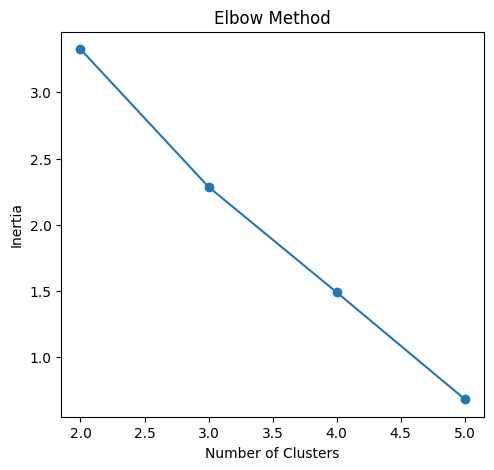

In [52]:
# Step 3: Determine the Optimal Number of Clusters using the Elbow Method
inertia = []
silhouette_scores = []

# Set maximum clusters to 5 (n_samples - 1)
max_clusters = min(6, 6 - 1)  # Adjust to ensure valid range

for k in range(2, max_clusters + 1):  # Start from 2 up to max_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_matrix)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


#### Silhouette Score
The Silhouette Score is a metric used to evaluate the quality of clusters formed by a clustering algorithm, such as K-Means. It measures how similar an object is to its own cluster compared to other clusters, providing a way to assess the separation and cohesion of clusters.

#### Interpretation
##### Score Range: The Silhouette Score ranges from -1 to +1.
##### A score close to +1 indicates that the data point is well-clustered; it is far from the neighboring clusters and close to the points in its own cluster.
##### A score of 0 means that the point is on or very close to the decision boundary between two neighboring clusters.
##### A negative score indicates that the data point may have been assigned to the wrong cluster since it is closer to points in another cluster than to its own.
#### Intuition Behind the Silhouette Score
##### Cohesion: A good clustering algorithm should minimize the distance between points within the same cluster (high cohesion). The value 𝑎(𝑖). a(i) reflects this aspect.
#####  Separation: A good clustering algorithm should maximize the distance between different clusters (high separation). 
The value 𝑏(𝑖) b(i) reflects this aspect.
#### Balance: The Silhouette Score assesses the trade-off between cohesion and separation for each data point. The closer the points are to their own cluster and the farther they are from others, the higher the silhouette score.

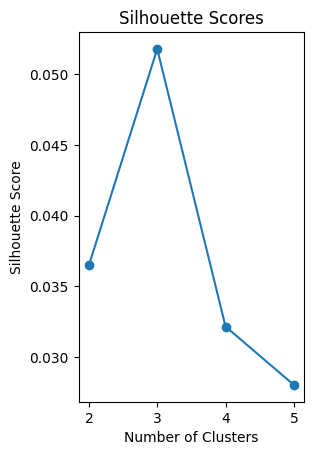

In [53]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [54]:
# Choose optimal number of clusters based on the plots (for example, let's say 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(tfidf_matrix)

# Assign cluster labels to each feedback
df['Cluster'] = kmeans.labels_



In [55]:
# Step 4: Customer Segmentation Analysis
print("\nCustomer Feedback with Cluster Labels:")
print(df[['CustomerID', 'Feedback', 'SatisfactionScore', 'Cluster']])

print("\nCustomer Segmentation Analysis:")
for i in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == i]
    average_satisfaction = cluster_data['SatisfactionScore'].mean()
    print(f"Cluster {i} - Average Satisfaction Score: {average_satisfaction:.2f}")
    print(cluster_data[['CustomerID', 'Feedback', 'SatisfactionScore']])
    print()



Customer Feedback with Cluster Labels:
   CustomerID                                           Feedback  \
0           1  The product quality is amazing and highly reco...   
1           2   Customer service was excellent and very helpful.   
2           3  I am satisfied with the product, but the deliv...   
3           4  Product is good, but customer service needs im...   
4           5  The quality is poor and customer support is un...   
5           6  Fast delivery, great product quality, and good...   

   SatisfactionScore  Cluster  
0                  5        1  
1                  4        0  
2                  3        2  
3                  2        0  
4                  1        1  
5                  4        1  

Customer Segmentation Analysis:
Cluster 0 - Average Satisfaction Score: 3.00
   CustomerID                                           Feedback  \
1           2   Customer service was excellent and very helpful.   
3           4  Product is good, but customer 

In [42]:
# Step 3: Evaluate Clustering with Silhouette Score
# (Silhouette score helps measure how similar feedback within clusters are)
silhouette_avg = silhouette_score(tfidf_matrix, kmeans.labels_)
print(f"\nAverage Silhouette Score: {silhouette_avg:.2f}")




Average Silhouette Score: 0.04


In [43]:
# Display customer feedback with cluster labels
print("\nCustomer Feedback with Cluster Labels:")
print(df)



Customer Feedback with Cluster Labels:
   CustomerID                                           Feedback  \
0           1  The product quality is amazing and highly reco...   
1           2   Customer service was excellent and very helpful.   
2           3  I am satisfied with the product, but the deliv...   
3           4  Product is good, but customer service needs im...   
4           5  The quality is poor and customer support is un...   
5           6  Fast delivery, great product quality, and good...   

   SatisfactionScore  Cluster  
0                  5        1  
1                  4        0  
2                  3        0  
3                  2        0  
4                  1        1  
5                  4        1  


In [44]:
# Optional: Display top terms per cluster
print("\nTop terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(num_clusters):
    print(f"\nCluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms
    print(", ".join(top_terms))



Top terms per cluster:

Cluster 0:
service, customer, product, slow, satisfied, excellent, helpful, improvement, needs, delivery

Cluster 1:
quality, support, product, unhelpful, poor, highly, amazing, recommended, great, fast


In [56]:
# Step 4: Customer Segmentation Analysis
print("\nCustomer Segmentation Analysis:")
for i in range(num_clusters):
    cluster_data = df[df['Cluster'] == i]
    average_satisfaction = cluster_data['SatisfactionScore'].mean()
    print(f"Cluster {i} - Average Satisfaction Score: {average_satisfaction:.2f}")
    print(cluster_data[['CustomerID', 'Feedback', 'SatisfactionScore']])
    print()



Customer Segmentation Analysis:
Cluster 0 - Average Satisfaction Score: 3.00
   CustomerID                                           Feedback  \
1           2   Customer service was excellent and very helpful.   
3           4  Product is good, but customer service needs im...   

   SatisfactionScore  
1                  4  
3                  2  

Cluster 1 - Average Satisfaction Score: 3.33
   CustomerID                                           Feedback  \
0           1  The product quality is amazing and highly reco...   
4           5  The quality is poor and customer support is un...   
5           6  Fast delivery, great product quality, and good...   

   SatisfactionScore  
0                  5  
4                  1  
5                  4  



In [57]:
# Optional: Display top terms per cluster
print("\nTop terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vectorizer.get_feature_names_out()

for i in range(optimal_clusters):
    print(f"\nCluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms
    print(", ".join(top_terms))



Top terms per cluster:

Cluster 0:
service, customer, helpful, excellent, improvement, needs, good, product, delivery, fast

Cluster 1:
quality, support, product, unhelpful, poor, highly, amazing, recommended, great, fast

Cluster 2:
slow, satisfied, delivery, product, unhelpful, helpful, customer, excellent, fast, good
